In [87]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas']
colors_for_languages = {'C': "#800000", 'HTML': "#FF8C00", 'C++': "#A52A2A", 
          'JavaScript':"#FFD700", 'C#': "#DC143C", 'Java': "#FF0000",
          'Python':"#FF6347", 'PHP': "#FF7F50", 'Pascal': "#CD5C5C", 
          'Ruby': "#F08080", 'Jupyter Notebook': "#E9967A", 'LLVM': "#FA8072", 
          'CSS': "#FFA07A",'Objective-C': "#FF4500"
         }

### Reading the pickles and finding average bytes of code written in various languages for every state 

In [81]:
import pickle

languages_per_state = {}

for state in states:
    #Loads users for every state
    with open('pickles/users_pickles/{}.pkl'.format(state), 'rb') as f:
        users  = pickle.load(f)

    num_of_users = len(users.get(state))

    #Loads languages in bytes for every state
    with open('pickles/languages_by_state_pickles/{}.pkl'.format(state), 'rb') as f:
        languages  = pickle.load(f)

    #Goes through the dictionary and finds the average
    for key,value in languages.items():
        languages[key] = round(value/num_of_users, 3)

    #sorts the language_per_state dictionary in descending order by value
    languages = (sorted(languages.items(), key = 
                 lambda language:(language[1]), reverse=True))
    languages_per_state[state] = languages[:10]

print(languages_per_state)    

{'Alabama': [('C', 3316236.863), ('HTML', 2931215.745), ('C++', 1598227.551), ('JavaScript', 1062064.775), ('C#', 997652.484), ('Java', 858131.48), ('Python', 663808.658), ('PHP', 509989.873), ('Pascal', 314974.955), ('Ruby', 205743.414)], 'Alaska': [('C', 8497578.237), ('C++', 1972404.69), ('HTML', 1800492.85), ('JavaScript', 1356046.64), ('Java', 1002265.478), ('Jupyter Notebook', 706421.738), ('LLVM', 564067.916), ('PHP', 548828.984), ('Python', 515417.847), ('C#', 477527.829)], 'Arizona': [('C', 7597071.564), ('JavaScript', 2152088.236), ('C++', 1461723.019), ('HTML', 1341147.329), ('Python', 1229411.502), ('Java', 1072525.474), ('Jupyter Notebook', 953258.788), ('PHP', 645123.527), ('C#', 401968.816), ('CSS', 264219.49)], 'Arkansas': [('C', 18166755.659), ('HTML', 7798431.38), ('JavaScript', 2717593.656), ('C++', 2653386.548), ('Java', 2625578.29), ('C#', 1627565.202), ('Python', 1358862.817), ('Objective-C', 991465.976), ('Jupyter Notebook', 887302.663), ('PHP', 848215.892)]}


### Draws treemap of languages for every states

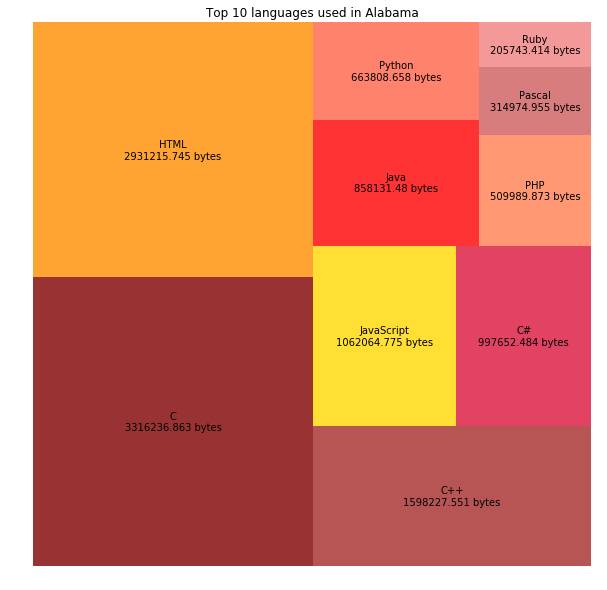

In [ ]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

for key,value in languages_per_state.items():
    fig = plt.figure(figsize=(10, 10))
    plt.title('Top 10 languages used in {}'.format(key))
    labels=["{}\n{} bytes".format(language[0], language[1]) for language in value]
    colors = [colors_for_languages.get(language[0]) for language in value]
    squarify.plot(sizes=[number[1] for number in value], label=labels, alpha=.8, color=colors)
    plt.axis('off')
    plt.show()